# Lab 4 Exercise 1

In [2]:
import pandas as pd
import numpy as np

In [4]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'
print(file_url)

https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv


In [5]:
df = pd.read_csv(file_url)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.to_csv('../data/raw/raw_data.csv')

In [11]:
df_cleaned = df

In [12]:
df_cleaned.drop("CustomerID", axis=1, inplace=True)

In [13]:
df_cleaned.to_csv('../data/interim/interm.csv')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test = train_test_split(df_cleaned, train_size=0.8)

In [16]:
X_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
181,Female,32,97,86
148,Female,34,78,22
102,Male,67,62,59
87,Female,22,57,55
9,Female,30,19,72


In [17]:
X_train_cleaned = X_train

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
num_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

In [20]:
sc = StandardScaler()

In [21]:
X_temp = pd.DataFrame(sc.fit_transform(X_train_cleaned[num_cols]), columns=num_cols)

In [22]:
cat_cols = ["Gender"]

In [23]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [24]:
X_temp['Gender'] = pd.DataFrame(ohe.fit_transform(X_train_cleaned[cat_cols]), columns=cat_cols)

In [25]:
X_train_cleaned = X_temp

# I missed the step to reindex the X_train_cleaned

In [26]:
X_train_cleaned

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-0.518590,1.362564,1.377270,0.0
1,-0.374537,0.644431,-1.076748,0.0
2,2.002333,0.039686,0.341981,1.0
3,-1.238854,-0.149296,0.188605,0.0
4,-0.662643,-1.585564,0.840453,0.0
...,...,...,...,...
155,-0.590616,0.342058,1.032173,0.0
156,-1.382906,-0.905227,0.955485,0.0
157,0.561806,-0.035907,-0.118148,0.0
158,-0.446564,0.946803,1.722366,0.0


In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [28]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fde776f5e90>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=14,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

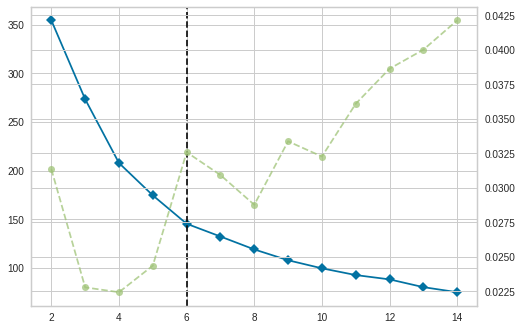

In [29]:
visualizer.fit(X_train_cleaned)

In [30]:
n_clusters = model.get_params('elbow_value_')

In [31]:
from sklearn.mixture import GaussianMixture

In [32]:
gmm = GaussianMixture(n_components=5, random_state=8)

In [33]:
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [63]:
obs = X_train_cleaned.loc[[0]]

In [64]:
gmm.predict(obs)

array([0])

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
num_transformer = Pipeline (
    steps =[
        ('Step1', StandardScaler())
    ]
)

In [69]:
cat_transformer = Pipeline (
    steps = [
        ('Step1', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [70]:
from sklearn.compose import ColumnTransformer

In [77]:
numeric_feature_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
category_feature_columns = X_train.select_dtypes(include=['object']).columns

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numColTranformer', num_transformer, numeric_feature_columns),
        ('catColTransformer', cat_transformer, category_feature_columns)
    ]
)

In [82]:
from sklearn.mixture import GaussianMixture
gm_pipe = Pipeline (
    steps = [
        ('PreProcess', preprocessor),
        ('Model', GaussianMixture(n_components=5, random_state=8))
    ]
)

In [88]:
gmm_pipe_model = gm_pipe.fit(X_train)

In [89]:
gmm_pipe_model.predict(X_train)

array([0, 3, 4, 2, 2, 0, 4, 4, 1, 4, 4, 4, 3, 4, 4, 2, 0, 2, 2, 2, 0, 1,
       3, 4, 2, 4, 3, 4, 4, 1, 4, 0, 0, 2, 2, 3, 4, 0, 4, 4, 4, 1, 2, 4,
       1, 2, 4, 0, 0, 4, 1, 2, 3, 1, 4, 1, 2, 4, 0, 4, 4, 2, 3, 3, 4, 2,
       0, 0, 0, 2, 3, 4, 2, 2, 4, 2, 1, 0, 2, 2, 3, 4, 3, 3, 1, 1, 3, 4,
       2, 1, 2, 0, 0, 0, 4, 2, 0, 3, 3, 0, 1, 4, 4, 0, 0, 0, 1, 4, 2, 4,
       4, 4, 2, 2, 0, 4, 4, 4, 4, 3, 2, 2, 3, 1, 4, 4, 4, 3, 0, 3, 4, 3,
       4, 3, 3, 2, 0, 3, 3, 0, 2, 3, 3, 1, 4, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 2, 4, 0, 3])

In [120]:
obs = X_train.head(1)

In [121]:
gmm_pipe_model.predict(obs)

array([0])

In [122]:
from joblib import dump


In [123]:
dump(gmm_pipe_model, '../models/gmm_pipe.joblib')

['../models/gmm_pipe.joblib']